# Image Forgery Detection using Recompression


## About the dataset


## Authentic images:

1. Au_ani_00001.jpg
   Au: Authentic
   ani: animal category
2. Other categories: arc (architecture), art, cha (characters), ind (indoor), nat (nature), pla (plants), txt (texture)

## Tampering images

a. Spliced image

        Tp_D_CRN_S_N_cha00063_art00014_11818.jpg

- Tp: Tampering
- D: Different (means the tampered region was copied from the different image)
- Next 5 letters stand for the techniques they used to create the images. Unfortunately, I don't remember exactly.
- cha00063: the source image
- art00014: the target image
- 11818: tampered image ID

b. Copy-move images

        Tp_S_NRN_M_N_pla00020_pla00020_10988.jpg

- Tp: Tampering
- S: Same (means the tampered region was copied from the same image)
- And the rest is similar to case a.

If you use the groundtruth dataset for a scientific publication, please cite the following papers:

- CASIA dataset

        @inproceedings{Dong2013,
        doi = {10.1109/chinasip.2013.6625374},
        url = {https://doi.org/10.1109/chinasip.2013.6625374},
        year = {2013},
        month = jul,
        publisher = {{IEEE}},
        author = {Jing Dong and Wei Wang and Tieniu Tan},
        title = {{CASIA} Image Tampering Detection Evaluation Database},
        booktitle = {2013 {IEEE} China Summit and International Conference on Signal and Information Processing}
        }

- CASIA groundtruth dataset

       @article{pham2019hybrid,
       title={Hybrid Image-Retrieval Method for Image-Splicing Validation},
       author={Pham, Nam Thanh and Lee, Jong-Weon and Kwon, Goo-Rak and Park, Chun-Su},
       journal={Symmetry},
       volume={11},
       number={1},
       pages={83},
       year={2019},
       publisher={Multidisciplinary Digital Publishing Institute}
       }


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageChops, ImageEnhance
import os


In [2]:
PATH = '../dataset/CASIA2/'
# PATH_TP='./dataset/CASIA2/Tp/'
data_label = ['Au', 'Tp']
label_lst = []
img_lst = []
for label in data_label:
    # print(label)
    # print(os.listdir(PATH+label))
    for img_file in os.listdir(PATH+label):
        img_lst.append(PATH+label+'/'+img_file)
        label_lst.append(label)
    # print(label_lst)


df = pd.DataFrame({'img': img_lst, 'label': label_lst})
df.head()


,img,label
0,../dataset/CASIA2/Au/Au_ani_00001.jpg,Au
1,../dataset/CASIA2/Au/Au_ani_00002.jpg,Au
2,../dataset/CASIA2/Au/Au_ani_00003.jpg,Au
3,../dataset/CASIA2/Au/Au_ani_00004.jpg,Au
4,../dataset/CASIA2/Au/Au_ani_00005.jpg,Au


In [3]:
df.label.value_counts()


Au    7491
Tp    5123
Name: label, dtype: int64

In [4]:
def size(x):
    return plt.imread(x).shape


df['size'] = df['img'].apply(size)


In [5]:
print(df['size'].head(20))
print(df['size'].tail(20))
# df.tail()


0     (256, 384, 3)
1     (256, 384, 3)
2     (256, 384, 3)
3     (256, 384, 3)
4     (256, 384, 3)
5     (256, 384, 3)
6     (256, 384, 3)
7     (256, 384, 3)
8     (256, 384, 3)
9     (256, 384, 3)
10    (256, 384, 3)
11    (256, 384, 3)
12    (256, 384, 3)
13    (256, 384, 3)
14    (256, 384, 3)
15    (256, 384, 3)
16    (256, 384, 3)
17    (256, 384, 3)
18    (256, 384, 3)
19    (256, 384, 3)
Name: size, dtype: object
12594    (256, 384, 3)
12595    (256, 384, 3)
12596    (256, 384, 3)
12597    (256, 384, 3)
12598    (256, 384, 3)
12599    (256, 384, 3)
12600    (256, 384, 3)
12601    (256, 384, 3)
12602    (256, 384, 3)
12603    (500, 375, 3)
12604    (180, 240, 3)
12605    (384, 256, 3)
12606    (256, 384, 3)
12607    (390, 561, 3)
12608    (256, 384, 3)
12609    (256, 384, 3)
12610    (314, 550, 3)
12611    (572, 800, 3)
12612    (256, 384, 3)
12613    (256, 384, 3)
Name: size, dtype: object


In [6]:
path_resaved = '../dataset/resaved/'


def difference(path):
    filename = path
    # print(path)
    resaved_name = filename.split('.')[-2]+'_resaved.jpg'
    # print(resaved_name)
    resaved_name = path_resaved+resaved_name.split('/')[-1]
    org = Image.open(filename).convert('RGB')
    org.save(resaved_name, 'JPEG', quality=90)
    resaved = Image.open(resaved_name)
    diff = ImageChops.difference(org, resaved)
    extrema = diff.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
            max_diff = 1
    scale = 255.0 / max_diff

    diff = ImageEnhance.Brightness(diff).enhance(scale)
    # diff
    return diff


In [7]:
from  pylab import *
X = []
y = []

for index, row in df.iterrows():
    x = array(difference(row[0]).resize((128, 128))).flatten()/255.0
    X.append(x)
    if row[1] == 'Au':
        y.append(0)
    else:
        y.append(1)

X = np.array(X)


In [41]:
X = X.reshape(-1, 128, 128, 3)


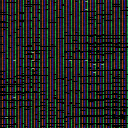

In [43]:
# x=difference(df['img'][9000]).resize((128, 128))
# # .flatten()/255.0
# x=array(x)
# print(x.shape)
# x.flatten().shape
# x
Image.fromarray(X[0],'RGB')
# Image.fromarray(X[10].reshape((128,128,3)),'RGB')